# Exploratory Data Analysis
# Data Glacier Internship
# Pattern Pros

### Background Information
The data was provided by a Portuguese banking institution from their marketing campaigns.

### Objective
Procure information about the trends in previous Portuguese marketing campaigns and their outcomes for term deposit product for a model before the launch of the product.

### Import Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Preprocessing the Data
Sarah Sindeband

In [ ]:
# read in the data
df_bank_full = pd.read_csv('bank-full.csv', delimiter=";", na_values="unknown")
df_bank_full

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


In [ ]:
df_bank_full.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [ ]:
# transforming the education column
new_df = df_bank_full.replace("primary", 1)
new_df = new_df.replace("secondary", 2)
new_df = new_df.replace("tertiary", 3)

ed_mode = new_df["education"].mode()

# imputation
up_df = new_df
up_df["education"].fillna(2, inplace=True)
# up_df

# transforming the job column
j_mode = up_df["job"].mode()

# imputation
up_df["job"].fillna("blue-collar", inplace=True)
# up_df

# transforming the contact column
con_mode = up_df["contact"].mode()

up_df["contact"].fillna("cellular", inplace=True)
up_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,3.0,no,2143,yes,no,cellular,5,may,261,1,-1,0,NaN,no
1,44,technician,single,2.0,no,29,yes,no,cellular,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,2.0,no,2,yes,yes,cellular,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,2.0,no,1506,yes,no,cellular,5,may,92,1,-1,0,NaN,no
4,33,blue-collar,single,2.0,no,1,no,no,cellular,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,3.0,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,1.0,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,2.0,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,2.0,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


### Inspecting the Data & Univariate Analysis of Numeric Data

In [ ]:
up_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,3.0,no,2143,yes,no,cellular,5,may,261,1,-1,0,NaN,no
1,44,technician,single,2.0,no,29,yes,no,cellular,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,2.0,no,2,yes,yes,cellular,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,2.0,no,1506,yes,no,cellular,5,may,92,1,-1,0,NaN,no
4,33,blue-collar,single,2.0,no,1,no,no,cellular,5,may,198,1,-1,0,NaN,no


In [ ]:
# columns
cols = up_df.columns
cols

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

#### The Age Column

In [ ]:
ages = up_df["age"]
ages.describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [ ]:
print("Skew: " + str(format(ages.skew(), ".2f")))
print("Kurtosis: " + str(format(ages.kurtosis(), ".2f")))

Skew: 0.68
Kurtosis: 0.32


Text(0, 0.5, 'Count')

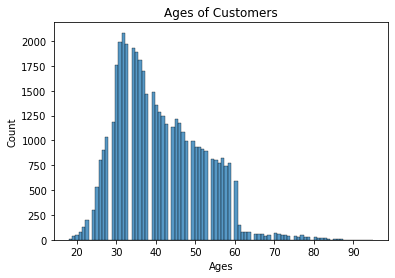

In [ ]:
sns.histplot(data = ages)
plt.title("Ages of Customers")
plt.xlabel("Ages")
plt.ylabel("Count")

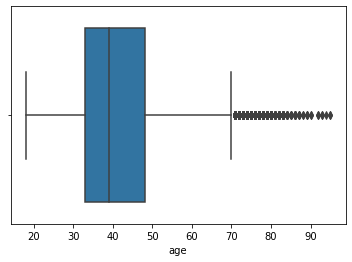

In [ ]:
sns.boxplot(x=ages)

#### The Job Column

In [ ]:
jobs = up_df.job.unique()
jobs

j_mode = up_df["job"].mode()
print("Most common job: " + j_mode)

0    Most common job: blue-collar
dtype: object


Text(0, 0.5, 'Count')

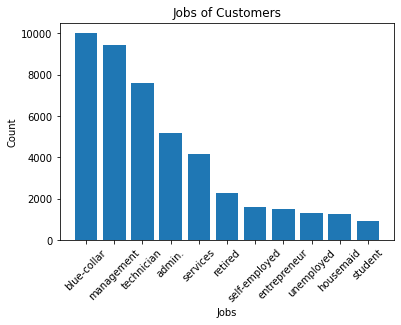

In [ ]:
jobs1 = up_df.job.value_counts()
plt.bar(jobs1.index, jobs1.values)
plt.title("Jobs of Customers")
plt.xticks(rotation=45)
plt.xlabel("Jobs")
plt.ylabel("Count")

#### The Marital Column

In [ ]:
rel_stat = up_df.marital.unique()
rel_stat

rel_stat_mode = up_df["marital"].mode()
print("Most common marital status: " + rel_stat_mode)

0    Most common marital status: married
dtype: object


Text(0, 0.5, 'Count')

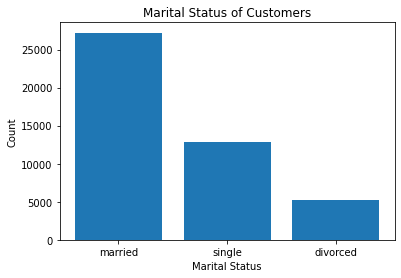

In [ ]:
rel_stat1 = up_df.marital.value_counts()
plt.bar(rel_stat1.index, rel_stat1.values)
plt.title("Marital Status of Customers")
plt.xlabel("Marital Status")
plt.ylabel("Count")

#### The Education Column
Based on the education system in Portugal (because this data was collected in Portugal)
- Primary school: ages 6 to 15
- Secondary education: ages 15 to 18
- Tertiary education: (higher education) ages 18 and above

In [ ]:
ed = up_df.education.value_counts()
ed

2.0    25059
3.0    13301
1.0     6851
Name: education, dtype: int64

Text(0, 0.5, 'Count')

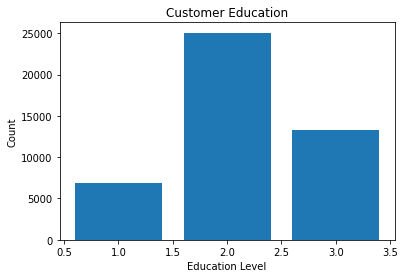

In [ ]:
plt.bar(ed.index, ed.values)
plt.title("Customer Education")
plt.xlabel("Education Level")
plt.ylabel("Count")

#### The Default Column
Whether or not the customer has any credit in default

In [ ]:
default = up_df.default.value_counts()
default

no     44396
yes      815
Name: default, dtype: int64

Text(0, 0.5, 'Count')

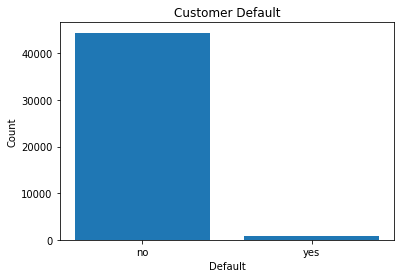

In [ ]:
plt.bar(default.index, default.values)
plt.title("Customer Default")
plt.xlabel("Default")
plt.ylabel("Count")

#### The Balance Column
The average annual balance in euros of the customer

In [ ]:
bal = up_df.balance
bal.describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [ ]:
print("Skew: " + str(format(bal.skew(), ".2f")))
print("Kurtosis: " + str(format(bal.kurtosis(), ".2f")))

Skew: 8.36
Kurtosis: 140.75


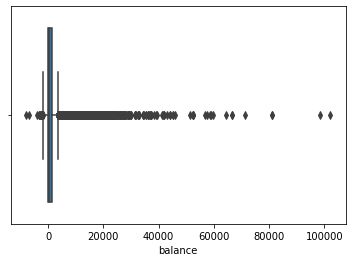

In [ ]:
sns.boxplot(x=bal)

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000.]), <a list of 8 Text major ticklabel objects>)

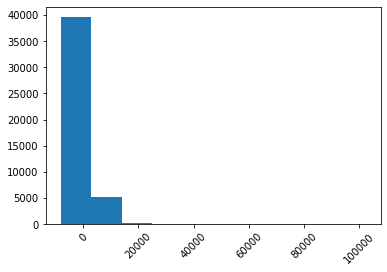

In [ ]:
plt.hist(bal, bins=10)
plt.xticks(rotation=45)

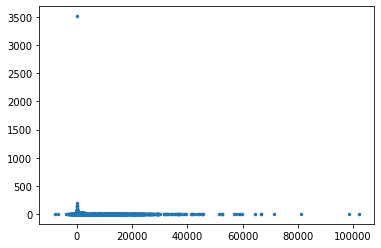

In [ ]:
bal1 = bal.value_counts()
plt.plot(bal1.index, bal1.values, linestyle='', marker = '.', markersize = 5)

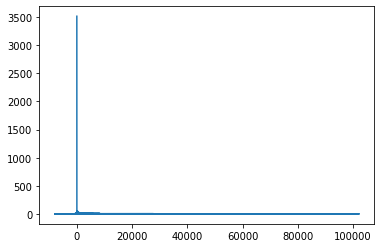

In [ ]:
plt.plot(bal1)

#### The Housing Column
Whether or not the customer has a housing loan

In [ ]:
house_stat = up_df.housing.unique()
print(house_stat)

house_stat_mode = up_df["housing"].mode()
print("Most common housing status: " + house_stat_mode)

housing1 = up_df.housing.value_counts()
housing1

['yes' 'no']
0    Most common housing status: yes
dtype: object


yes    25130
no     20081
Name: housing, dtype: int64

Text(0, 0.5, 'Count')

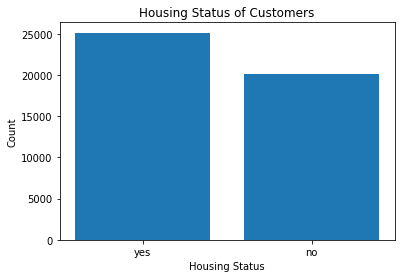

In [ ]:
plt.bar(housing1.index, housing1.values)
plt.title("Housing Status of Customers")
plt.xlabel("Housing Status")
plt.ylabel("Count")

#### The Loan Column
Whether or not the customer has a personal loan

In [ ]:
loan_stat = up_df.loan.unique()
print(loan_stat)

loan_stat_mode = up_df["loan"].mode()
print("Most common loan status: " + loan_stat_mode)

loan1 = up_df.loan.value_counts()
print(loan1)

['no' 'yes']
0    Most common loan status: no
dtype: object
no     37967
yes     7244
Name: loan, dtype: int64


Text(0, 0.5, 'Count')

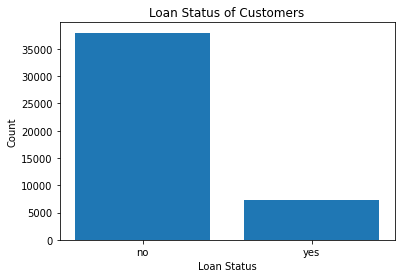

In [ ]:
plt.bar(loan1.index, loan1.values)
plt.title("Loan Status of Customers")
plt.xlabel("Loan Status")
plt.ylabel("Count")

#### The Contact Column
Mode of contact during the previous campaign

In [ ]:
con = up_df["contact"]
print(con.unique())

con_stat_mode = up_df["contact"].mode()
print("Most common mode of contact: " + con_stat_mode)

con1 = up_df.contact.value_counts()
con1

['cellular' 'telephone']
0    Most common mode of contact: cellular
dtype: object


cellular     42305
telephone     2906
Name: contact, dtype: int64

Text(0, 0.5, 'Count')

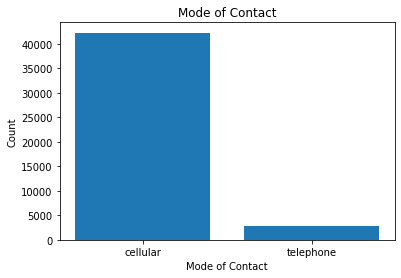

In [ ]:
plt.bar(con1.index, con1.values)
plt.title("Mode of Contact")
plt.xlabel("Mode of Contact")
plt.ylabel("Count")

#### The Day Column
The last contact day of the month from the previous campaign

In [ ]:
day = up_df["day"]
day.describe()

count    45211.000000
mean        15.806419
std          8.322476
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64

In [ ]:
print("Skew: " + str(format(day.skew(), ".2f")))
print("Kurtosis: " + str(format(day.kurtosis(), ".2f")))

Skew: 0.09
Kurtosis: -1.06


#### The Month Column
The last contact month of the year from the previous campaign

In [ ]:
mon_stat = up_df.month.unique()
print(mon_stat)

mon_stat_mode = up_df["month"].mode()
print("Mode of the month column: " + mon_stat_mode)

mon = up_df.month.value_counts()
print(mon)

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
0    Mode of the month column: may
dtype: object
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64


Text(0, 0.5, 'Count')

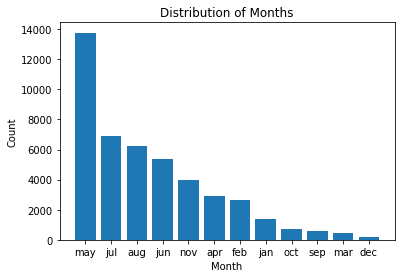

In [ ]:
plt.bar(mon.index, mon.values)
plt.title("Distribution of Months")
plt.xlabel("Month")
plt.ylabel("Count")

#### The Duration Column
The last contact duration in seconds

In [ ]:
dur = up_df["duration"]
dur.describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [ ]:
print("Skew: " + str(format(dur.skew(), ".2f")))
print("Kurtosis: " + str(format(dur.kurtosis(), ".2f")))

Skew: 3.14
Kurtosis: 18.15


Text(0, 0.5, 'Count')

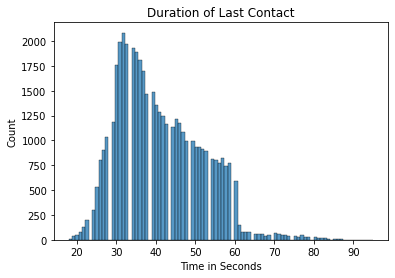

In [ ]:
sns.histplot(data = ages)
plt.title("Duration of Last Contact")
plt.xlabel("Time in Seconds")
plt.ylabel("Count")

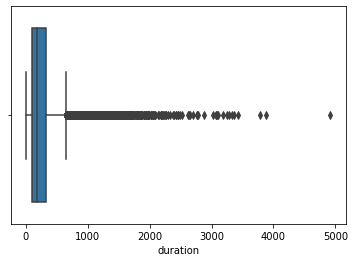

In [ ]:
sns.boxplot(x=dur)

#### The Campaign Column
The number of contacts performed during this campaign and for this client

In [ ]:
camp_count = up_df["campaign"]
camp_count.describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

In [ ]:
print("Skew: " + str(format(camp_count.skew(), ".2f")))
print("Kurtosis: " + str(format(camp_count.kurtosis(), ".2f")))

Skew: 4.90
Kurtosis: 39.25


Text(0, 0.5, 'Count')

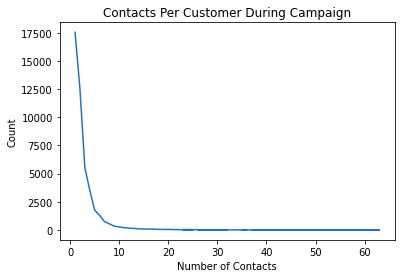

In [ ]:
plt.plot(camp_count.value_counts())
plt.title("Contacts Per Customer During Campaign")
plt.xlabel("Number of Contacts")
plt.ylabel("Count")

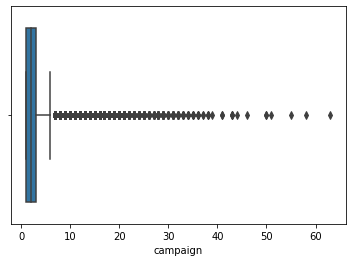

In [ ]:
sns.boxplot(x=camp_count)

#### The Pdays Column
The number of days that passed by after the client was last contacted from a previous campaign

In [ ]:
p_day = up_df["pdays"]
p_day.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [ ]:
print("Skew: " + str(format(p_day.skew(), ".2f")))
print("Kurtosis: " + str(format(p_day.kurtosis(), ".2f")))

Skew: 2.62
Kurtosis: 6.94


In [ ]:
p_day.unique()

array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

#### The Previous Column
The number of previous contacts performed before this campaign per customer

In [ ]:
prev = up_df.previous
prev.describe()

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

In [ ]:
prev.unique()

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41])

#### The Poutcome Column
Thhe outcome of the previous campaign

In [ ]:
p_out = up_df["poutcome"]
print(p_out.unique())

[nan 'failure' 'other' 'success']


#### The Y Column
Whether or not the customer subscribed a term deposit

In [ ]:
y = up_df.y

ys = y.value_counts()
print(ys)

y_mode = up_df["y"].mode()
print("Mode of the y column: " + y_mode)

no     39922
yes     5289
Name: y, dtype: int64
0    Mode of the y column: no
dtype: object


Text(0, 0.5, 'Count')

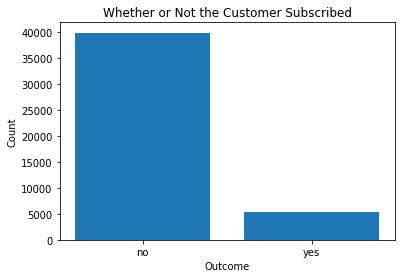

In [ ]:
plt.bar(ys.index, ys.values)
plt.title("Whether or Not the Customer Subscribed")
plt.xlabel("Outcome")
plt.ylabel("Count")

### Hypothesis

hypothesis 1, Daniel Kingswood

converting the y column to 0s and 1s to find correlations between the variables 

In [ ]:
up_df['y'].replace(['no', 'yes'], [0,1], inplace = True)

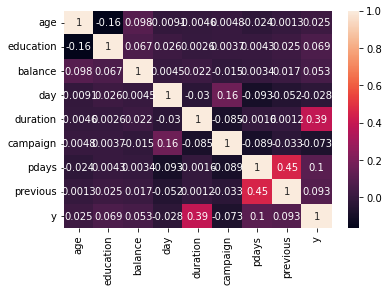

In [ ]:
sns.heatmap(up_df.corr(), annot=True)
plt.show()

correlation between all the numeric columns and the classification column are weak

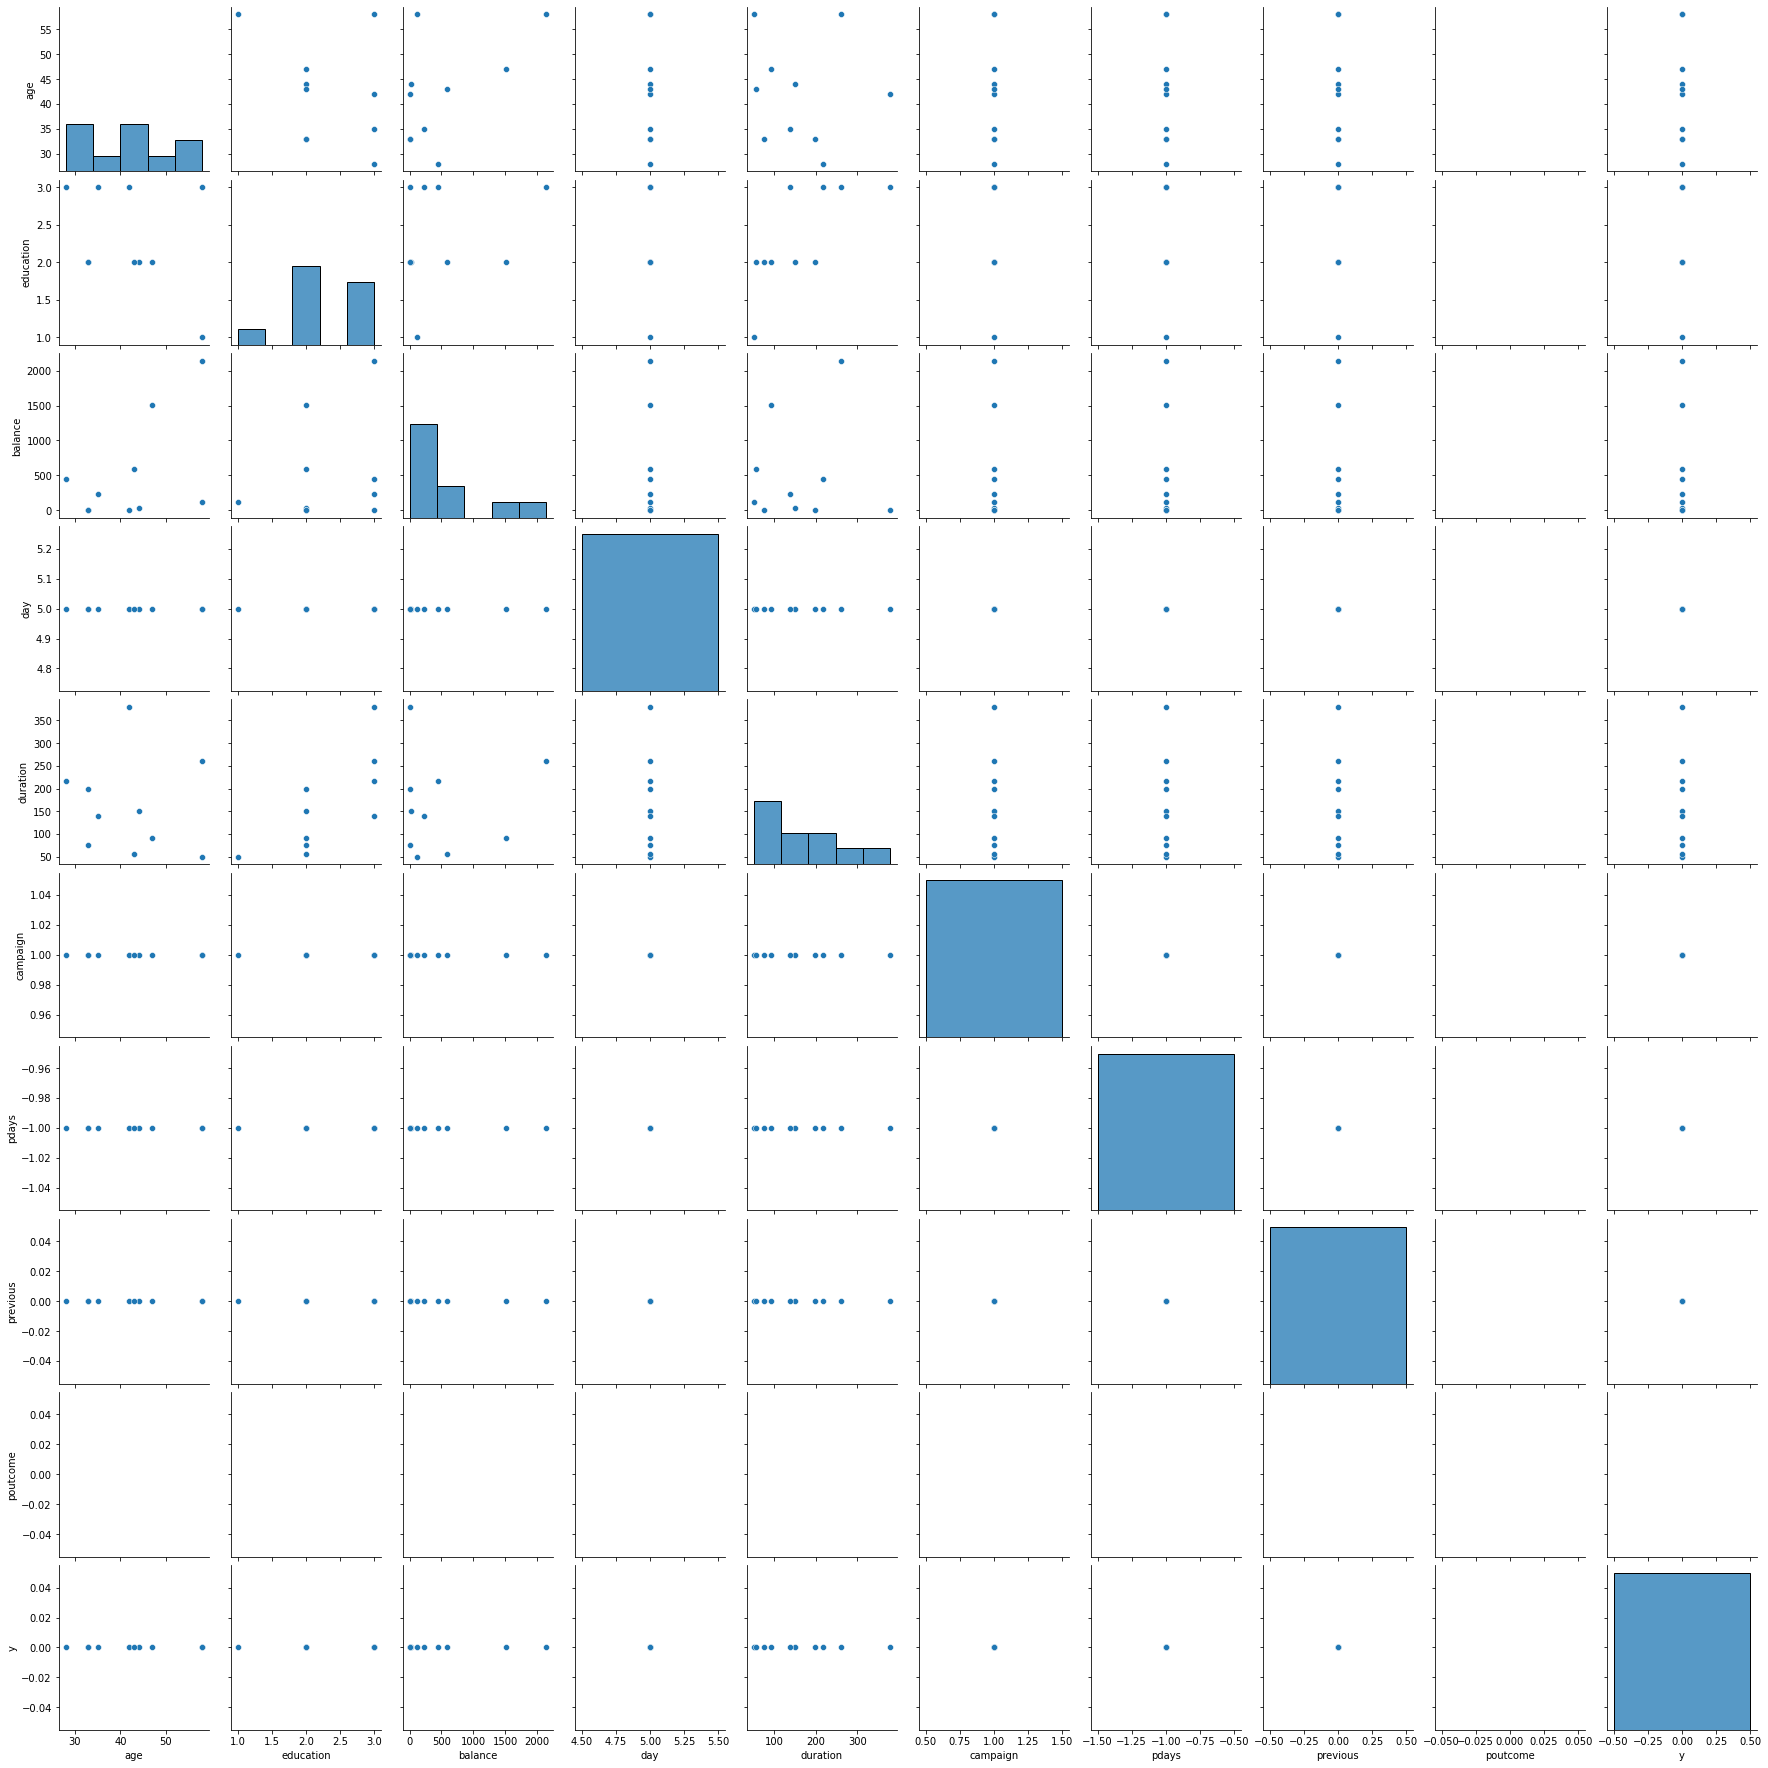

In [ ]:
sns.pairplot(up_df.head(10))

also in scatter graphs between numeric columns there seems little correlation between any variables

duration column could be investigated with a hypothesis test or we could look into the relationship between categorical values and the y column using chi squares test, regression etc

first hypothesis, take the null hypothesis to be month and y are independent

In [ ]:
chisqt = pd.crosstab(up_df.y, up_df.housing, margins=True)
print(chisqt)

housing     no    yes    All
y                           
0        16727  23195  39922
1         3354   1935   5289
All      20081  25130  45211


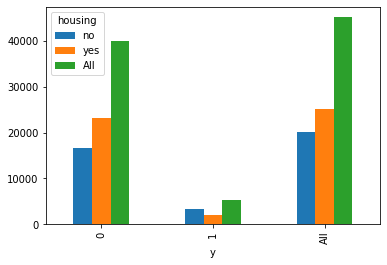

In [ ]:
chisqt.plot.bar()

In [ ]:
from scipy.stats import chi2_contingency
value = np.array([chisqt.iloc[0][0:12].values,
                  chisqt.iloc[1][0:12].values])
print(chi2_contingency(value)[0:3])

(875.6937181054402, 7.006888307588153e-191, 2)


p value is zero, so we reject null hypothesis, and therefore the month is not independent of the outcome y 

#EDA: Jay Panara

Null Hypothesis: No relationship between the job and the outcome.

Alternative Hypothesis: Relationship between the job and the outcome.

Creating a dataframe with 'No' or 0 as the output.

In [ ]:
df1=up_df[up_df["y"]==1]
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
83,59,admin.,married,2.0,no,2343,yes,no,cellular,5,may,1042,1,-1,0,NaN,1
86,56,admin.,married,2.0,no,45,no,no,cellular,5,may,1467,1,-1,0,NaN,1
87,41,technician,married,2.0,no,1270,yes,no,cellular,5,may,1389,1,-1,0,NaN,1
129,55,services,married,2.0,no,2476,yes,no,cellular,5,may,579,1,-1,0,NaN,1
168,54,admin.,married,3.0,no,184,no,no,cellular,5,may,673,2,-1,0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,2.0,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,1
45205,25,technician,single,2.0,no,505,no,yes,cellular,17,nov,386,2,-1,0,NaN,1
45206,51,technician,married,3.0,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,1
45207,71,retired,divorced,1.0,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,1


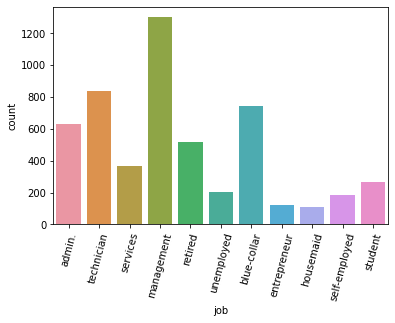

In [ ]:

plot = sns.countplot(x='job', data=df1)
plot.set_xticklabels(plot.get_xticklabels(), rotation=75)
plot


The people with blue collar. mangement and technician jobs have greater say in rejecting the outcome.

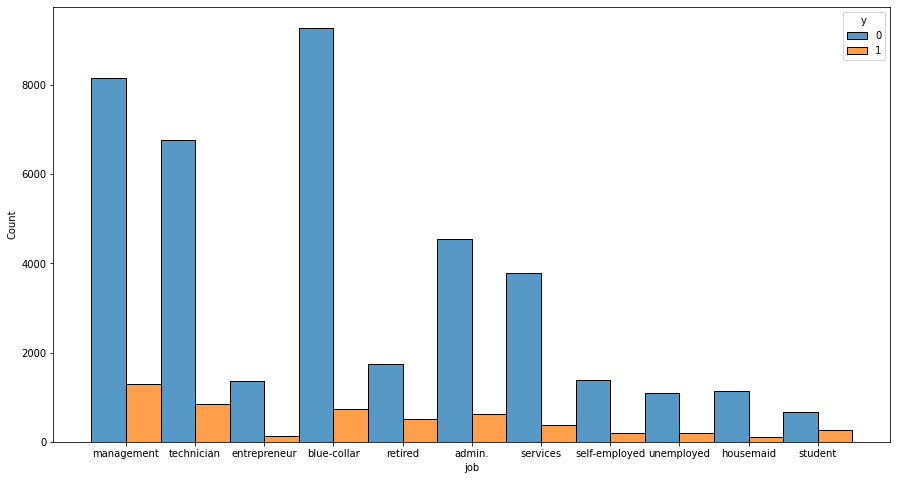

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 15,8
sns.histplot(data=up_df, x="job", hue="y", multiple="dodge")

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

table_contigency= pd.crosstab(up_df['job'], up_df['y']) 
table_contigency

y,0,1
job,,
admin.,4540,631
blue-collar,9278,742
entrepreneur,1364,123
housemaid,1131,109
management,8157,1301
retired,1748,516
self-employed,1392,187
services,3785,369
student,669,269


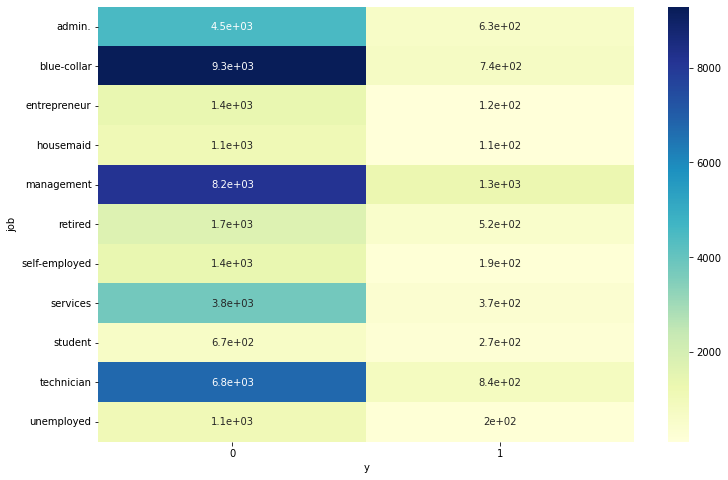

In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(table_contigency, annot=True, cmap="YlGnBu")

In [ ]:
# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(table_contigency) 
# Print the p-value
print(p)

5.575427995540736e-172


p value is greater than 0.1 which shows that there is no significant evidence against the null hypothesis and thus there is no relation between Job and the outcome.

## **EDA**(Shreya Dwivedi)


*   Hypothesis Test to verify: "People of age above 23 are less likely to subscrbe the term deposit."
*   Hypothesis test to check if there is a relationship between p_days and previous.
*  Hypothesis test to check if there is a correlation between our target variable and other categorical variables
*  Univariate and Bivariate Analysis on Categorical Data







In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# read in data
df_bank = pd.read_csv('bank.csv', delimiter=";")
df_bank_full = pd.read_csv('bank-full.csv', delimiter=";")

In [ ]:
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
df_bank_full

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
df_bank_full.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
#columns containing unknown df_bank
for column in df_bank:
  if 'unknown' in df_bank[column].values:
    print(column)

job
education
contact
poutcome


In [ ]:
#columns containing unknown df_bank_full
for column in df_bank_full:
  if 'unknown' in df_bank_full[column].values:
    print(column)


job
education
contact
poutcome


In [ ]:
# Predicting the unknown values using ML model

In [ ]:
# Step1: Replacing unknown values with NaN values for df_bank
cols=['job','education','contact','poutcome']
mask = df_bank[cols].applymap(lambda x: x!="unknown")

df_bank[cols] = df_bank[cols].where(mask)
print (df_bank)

      age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous 

In [ ]:
#Replacing unknown values with NaN values for df_bank_full
cols=['job','education','contact','poutcome']
mask = df_bank_full[cols].applymap(lambda x: x!="unknown")

df_bank_full[cols] = df_bank_full[cols].where(mask)
print (df_bank_full)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married        NaN      no     1506     yes   no   
4       33           NaN    single        NaN      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

In [ ]:
sum=0
count=0
for i,val in enumerate(df_bank['pdays']):
  if val!=-1:
    sum+=val
    count+=(i+1)
mean=sum//count
for i,val in enumerate(df_bank['pdays']):
  if val==-1:
    df_bank['pdays'][i]=mean 
df_bank   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,0,0,NaN,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,NaN,3,jun,199,4,0,0,NaN,no
4,59,blue-collar,married,secondary,no,0,yes,no,NaN,5,may,226,1,0,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,0,0,NaN,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,NaN,9,may,153,1,0,0,NaN,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,0,0,NaN,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
sum=0
count=0
for i,val in enumerate(df_bank_full['pdays']):
  if val!=-1:
    sum+=val
    count+=(i+1)
mean=sum//count
for i,val in enumerate(df_bank_full['pdays']):
  if val==-1:
    df_bank_full['pdays'][i]=mean 
df_bank_full   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,0,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,0,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,0,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,0,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,0,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,0,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,0,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,0,0,NaN,no


In [ ]:
df_bank_full.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [ ]:
df_bank.isnull().sum()

age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64

In [ ]:
# Step 3: We will encode the categorical columns which do not have unknown values using one hot encoding,
independent_cat_col=['marital', 'default','housing','day', 'month','loan','y']
dependent_cat_col=['job','education']

In [ ]:
# Dropping the columns contact and poutcome as contact wont contribute much to y and most of the values of poutcome are missing.
df_bank=df_bank.drop(columns=['contact','poutcome'])

In [ ]:
# Dropping the columns contact and poutcome as contact wont contribute much to y and most of the values of poutcome are missing.
df_bank_full=df_bank_full.drop(columns=['contact','poutcome'])

In [ ]:
# One-hot encoding df_bank
data_hot_encoded = pd.get_dummies(df_bank[independent_cat_col])

#Extract only the columns that didnt need to be encoded
data_other_cols = df_bank.drop(columns=independent_cat_col)

#Concatenate the two dataframes : 
df_bank_out = pd.concat([data_hot_encoded, data_other_cols], axis=1)

In [ ]:
df_bank_out

,day,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,month_apr,month_aug,...,y_no,y_yes,age,job,education,balance,duration,campaign,pdays,previous
0,19,0,1,0,1,0,1,0,0,0,...,1,0,30,unemployed,primary,1787,79,1,0,0
1,11,0,1,0,1,0,0,1,0,0,...,1,0,33,services,secondary,4789,220,1,339,4
2,16,0,0,1,1,0,0,1,1,0,...,1,0,35,management,tertiary,1350,185,1,330,1
3,3,0,1,0,1,0,0,1,0,0,...,1,0,30,management,tertiary,1476,199,4,0,0
4,5,0,1,0,1,0,0,1,0,0,...,1,0,59,blue-collar,secondary,0,226,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,30,0,1,0,1,0,0,1,0,0,...,1,0,33,services,secondary,-333,329,5,0,0
4517,9,0,1,0,0,1,0,1,0,0,...,1,0,57,self-employed,tertiary,-3313,153,1,0,0
4518,19,0,1,0,1,0,1,0,0,1,...,1,0,57,technician,secondary,295,151,11,0,0
4519,6,0,1,0,1,0,1,0,0,0,...,1,0,28,blue-collar,secondary,1137,129,4,211,3


In [ ]:
df_bank['balance']

0       1787
1       4789
2       1350
3       1476
4          0
        ... 
4516    -333
4517   -3313
4518     295
4519    1137
4520    1136
Name: balance, Length: 4521, dtype: int64

In [ ]:
# One-hot encoding df_bank_full
data_hot_encoded = pd.get_dummies(df_bank_full[independent_cat_col])

#Extract only the columns that didnt need to be encoded
data_other_cols = df_bank_full.drop(columns=independent_cat_col)

#Concatenate the two dataframes : 
df_bank_full_out = pd.concat([data_hot_encoded, data_other_cols], axis=1)

In [ ]:
df_bank_full_out

,day,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,month_apr,month_aug,...,y_no,y_yes,age,job,education,balance,duration,campaign,pdays,previous
0,5,0,1,0,1,0,0,1,0,0,...,1,0,58,management,tertiary,2143,261,1,0,0
1,5,0,0,1,1,0,0,1,0,0,...,1,0,44,technician,secondary,29,151,1,0,0
2,5,0,1,0,1,0,0,1,0,0,...,1,0,33,entrepreneur,secondary,2,76,1,0,0
3,5,0,1,0,1,0,0,1,0,0,...,1,0,47,blue-collar,NaN,1506,92,1,0,0
4,5,0,0,1,1,0,1,0,0,0,...,1,0,33,NaN,NaN,1,198,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,17,0,1,0,1,0,1,0,0,0,...,0,1,51,technician,tertiary,825,977,3,0,0
45207,17,1,0,0,1,0,1,0,0,0,...,0,1,71,retired,primary,1729,456,2,0,0
45208,17,0,1,0,1,0,1,0,0,0,...,0,1,72,retired,secondary,5715,1127,5,184,3
45209,17,0,1,0,1,0,1,0,0,0,...,1,0,57,blue-collar,secondary,668,508,4,0,0


In [ ]:
df_bank_out.isnull().sum()

day                   0
marital_divorced      0
marital_married       0
marital_single        0
default_no            0
default_yes           0
housing_no            0
housing_yes           0
month_apr             0
month_aug             0
month_dec             0
month_feb             0
month_jan             0
month_jul             0
month_jun             0
month_mar             0
month_may             0
month_nov             0
month_oct             0
month_sep             0
loan_no               0
loan_yes              0
y_no                  0
y_yes                 0
age                   0
job                  38
education           187
balance               0
duration              0
campaign              0
pdays                 0
previous              0
dtype: int64

In [ ]:
df_bank_full_out.isnull().sum()

day                    0
marital_divorced       0
marital_married        0
marital_single         0
default_no             0
default_yes            0
housing_no             0
housing_yes            0
month_apr              0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
loan_no                0
loan_yes               0
y_no                   0
y_yes                  0
age                    0
job                  288
education           1857
balance                0
duration               0
campaign               0
pdays                  0
previous               0
dtype: int64

In [ ]:
#  Make missing records as our Testing data.
#  Make non-missing records as our Training data.

# Testing data

In [ ]:
# Applying Logistic Regression to predict the missing values
def LR(X_train, y_train, X_test):
  C_list=[10**0,10**1,10**2,10**3,1050,1075,1500, 1525,1575, 1590]
  list_score=[]
  max_C=float('-inf')
  X_train_norm = preprocessing.normalize(X_train) 
  for i in C_list:
    model = LogisticRegression(penalty='l1', solver="saga", tol=0.1,C=i,multi_class='multinomial')
    model = model.fit(X_train, y_train)
    score=cross_val_score(model,X_train_norm,y_train,cv=5,scoring='accuracy')
    mean_score=score.mean()
    list_score.append([i,mean_score])
  for i in list_score:
    if i[1]>max_C:
      max_C=i[1]
  model_l1_multi=LogisticRegression(penalty='l1', solver="saga", tol=0.1, C=max_C,multi_class='multinomial')
  model_l1_multi.fit(X_train_norm,y_train)
  y_test=model_l1_multi.predict(X_test)
  return y_test

In [ ]:
# Cannot use Naive Bayes as negative values are present
def Multinormial_Bayes(X_train, y_train, X_test):
  X_train_norm = preprocessing.normalize(X_train) 
  mNB = MultinomialNB()
  model_NB = mNB.fit(X_train_norm, y_train)
  y_test=model_NB.predict(X_test)
  return y_test


In [ ]:
def KnClassify(X_train, y_train, X_test):
  knn_clf=KNeighborsClassifier()
  knn_clf.fit(X_train,y_train)
  # y_test=[]
  y_test=knn_clf.predict(X_test)
  return y_test

In [ ]:
def splittingTestTrainJob(df):
  df=df.drop(columns=['education'])
  df_train = df[~pd.isnull(df['job'])]
  df_test = df[pd.isnull(df['job'])]
  X_train_df_bank=df_train.drop(columns=['job'])
  y_train_df_bank=df_train['job']
  X_test_df_bank=df_test.drop(columns=['job'])
  return X_train_df_bank,y_train_df_bank,X_test_df_bank

In [ ]:
def splittingTestTrainEducation(df_bank_out):
  df_bank_out_job=df_bank_out.drop(columns=['job'])
  df_bank_job_train = df_bank_out_job[~pd.isnull(df_bank_out_job['education'])]
  df_bank_job_test = df_bank_out_job[pd.isnull(df_bank_out_job['education'])]
  X_train_df_bank=df_bank_job_train.drop(columns=['education'])
  y_train_df_bank=df_bank_job_train['education']
  X_test_df_bank=df_bank_job_test.drop(columns=['education'])
  return X_train_df_bank,y_train_df_bank,X_test_df_bank

In [ ]:
def update_dataframe_job(X_test_df_bank,y_test_df_bank, X_train_df_bank,y_train_df_bank):
  test_job=X_test_df_bank.copy()
  test_job=test_job.reset_index(drop=True)
  test_job['job']=y_test_df_bank
  test_job_train=X_train_df_bank.copy()
  test_job_train=test_job_train.reset_index(drop=True)
  y_train=y_train_df_bank.reset_index(drop=True)
  test_job_train["job"]=y_train
  new_df_bank_job=pd.concat([test_job_train,test_job])
  return new_df_bank_job

In [ ]:
def update_dataframe_education(X_test_df_bank,y_test_df_bank, X_train_df_bank,y_train_df_bank):
  test_education=X_test_df_bank.copy()
  test_education=test_education.reset_index(drop=True)
  test_education['education']=y_test_df_bank
  test_education_train=X_train_df_bank.copy()
  test_education_train=test_education_train.reset_index(drop=True)
  y_train=y_train_df_bank.reset_index(drop=True)
  test_education_train["education"]=y_train
  new_df_bank_education=pd.concat([test_education_train,test_education])
  return new_df_bank_education

In [ ]:
def new_data(new_df_bank_job,new_df_bank_education):
  new_df_bank=new_df_bank_job
  new_df_bank_education.reset_index()['education']
  new_df_bank['education']=new_df_bank_education.reset_index()['education']
  new_df_bank=new_df_bank.reset_index(drop=True)
  return new_df_bank

In [ ]:
#Splitting data into test and train
X_train_df_bank,y_train_df_bank,X_test_df_bank=splittingTestTrainJob(df_bank_out)

In [ ]:
# Predicting job using Logistic Multinomial Regression
y_test_df_bank=LR(X_train_df_bank, y_train_df_bank, X_test_df_bank)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
X_train_df_bank_ii,y_train_df_bank_ii,X_test_df_bank_ii=splittingTestTrainEducation(df_bank_out)

In [ ]:
# Predicting education using Logistic Multinomial Regression
y_test_df_bank_ii=LR(X_train_df_bank_ii, y_train_df_bank_ii, X_test_df_bank_ii)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
# Similarly for df_bak_full
X_train_df_bank_full,y_train_df_bank_full,X_test_df_bank_full=splittingTestTrainJob(df_bank_full_out)

In [ ]:
# len(X_train_df_bank_full)

In [ ]:
# Predicting job using Logistic Multinomial Regression
y_test_df_bank_full=LR(X_train_df_bank_full, y_train_df_bank_full, X_test_df_bank_full)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
X_train_df_bank_full_ii,y_train_df_bank_full_ii,X_test_df_bank_full_ii=splittingTestTrainEducation(df_bank_full_out)

In [ ]:
len(X_train_df_bank_full_ii)

43354

In [ ]:
# Predicting education using Logistic Multinomial Regression
y_test_df_bank_full_ii=LR(X_train_df_bank_full_ii, y_train_df_bank_full_ii, X_test_df_bank_full_ii)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
# Getting the dataset with predicted values for df_bank
new_df_bank_job=update_dataframe_job(X_test_df_bank, y_test_df_bank, X_train_df_bank, y_train_df_bank)
new_df_bank_job

,day,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,month_apr,month_aug,...,loan_yes,y_no,y_yes,age,balance,duration,campaign,pdays,previous,job
0,19,0,1,0,1,0,1,0,0,0,...,0,1,0,30,1787,79,1,0,0,unemployed
1,11,0,1,0,1,0,0,1,0,0,...,1,1,0,33,4789,220,1,339,4,services
2,16,0,0,1,1,0,0,1,1,0,...,0,1,0,35,1350,185,1,330,1,management
3,3,0,1,0,1,0,0,1,0,0,...,1,1,0,30,1476,199,4,0,0,management
4,5,0,1,0,1,0,0,1,0,0,...,0,1,0,59,0,226,1,0,0,blue-collar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,27,0,1,0,1,0,1,0,0,0,...,0,1,0,71,353,208,1,93,2,retired
34,5,0,1,0,1,0,1,0,0,0,...,0,1,0,59,3940,48,2,0,0,retired
35,5,0,0,1,1,0,1,0,0,0,...,0,1,0,39,914,20,1,0,0,retired
36,6,0,1,0,1,0,1,0,0,1,...,0,0,1,65,4717,256,1,0,0,retired


In [ ]:
new_df_bank_education=update_dataframe_education(X_test_df_bank_ii, y_test_df_bank_ii, X_train_df_bank_ii, y_train_df_bank_ii)
new_df_bank_education

,day,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,month_apr,month_aug,...,loan_yes,y_no,y_yes,age,balance,duration,campaign,pdays,previous,education
0,19,0,1,0,1,0,1,0,0,0,...,0,1,0,30,1787,79,1,0,0,primary
1,11,0,1,0,1,0,0,1,0,0,...,1,1,0,33,4789,220,1,339,4,secondary
2,16,0,0,1,1,0,0,1,1,0,...,0,1,0,35,1350,185,1,330,1,tertiary
3,3,0,1,0,1,0,0,1,0,0,...,1,1,0,30,1476,199,4,0,0,tertiary
4,5,0,1,0,1,0,0,1,0,0,...,0,1,0,59,0,226,1,0,0,secondary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,16,0,1,0,1,0,1,0,0,0,...,0,0,1,73,519,434,1,57,1,secondary
183,31,0,1,0,1,0,0,1,0,0,...,0,0,1,50,2284,1088,17,0,0,secondary
184,2,0,1,0,1,0,0,1,0,0,...,0,1,0,48,439,212,1,249,2,tertiary
185,21,0,1,0,1,0,1,0,0,0,...,0,1,0,59,3534,216,4,0,0,secondary


In [ ]:
# new_df_bank_education.isna().sum()

In [ ]:
# New Bank dataframe for df_bank
new_df_bank=new_data(new_df_bank_job,new_df_bank_education)
new_df_bank

,day,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,month_apr,month_aug,...,y_no,y_yes,age,balance,duration,campaign,pdays,previous,job,education
0,19,0,1,0,1,0,1,0,0,0,...,1,0,30,1787,79,1,0,0,unemployed,primary
1,11,0,1,0,1,0,0,1,0,0,...,1,0,33,4789,220,1,339,4,services,secondary
2,16,0,0,1,1,0,0,1,1,0,...,1,0,35,1350,185,1,330,1,management,tertiary
3,3,0,1,0,1,0,0,1,0,0,...,1,0,30,1476,199,4,0,0,management,tertiary
4,5,0,1,0,1,0,0,1,0,0,...,1,0,59,0,226,1,0,0,blue-collar,secondary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,27,0,1,0,1,0,1,0,0,0,...,1,0,71,353,208,1,93,2,retired,secondary
4517,5,0,1,0,1,0,1,0,0,0,...,1,0,59,3940,48,2,0,0,retired,primary
4518,5,0,0,1,1,0,1,0,0,0,...,1,0,39,914,20,1,0,0,retired,secondary
4519,6,0,1,0,1,0,1,0,0,1,...,0,1,65,4717,256,1,0,0,retired,secondary


In [ ]:
# new_df_bank.isna().sum()

In [ ]:
# Similarly # Getting the dataset with predicted values for df_bank

In [ ]:
len(y_train_df_bank_full)

44923

In [ ]:
new_df_bank_full_job=update_dataframe_job(X_test_df_bank_full, y_test_df_bank_full, X_train_df_bank_full, y_train_df_bank_full)
new_df_bank_full_job

,day,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,month_apr,month_aug,...,loan_yes,y_no,y_yes,age,balance,duration,campaign,pdays,previous,job
0,5,0,1,0,1,0,0,1,0,0,...,0,1,0,58,2143,261,1,0,0,management
1,5,0,0,1,1,0,0,1,0,0,...,0,1,0,44,29,151,1,0,0,technician
2,5,0,1,0,1,0,0,1,0,0,...,1,1,0,33,2,76,1,0,0,entrepreneur
3,5,0,1,0,1,0,0,1,0,0,...,0,1,0,47,1506,92,1,0,0,blue-collar
4,5,0,1,0,1,0,0,1,0,0,...,0,1,0,35,231,139,1,0,0,management
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,7,0,1,0,1,0,1,0,0,0,...,0,0,1,45,406,314,1,0,0,student
284,9,0,1,0,1,0,1,0,0,0,...,0,1,0,64,2799,378,4,0,0,student
285,11,0,0,1,1,0,1,0,0,0,...,0,0,1,28,326,450,1,231,1,student
286,8,0,1,0,1,0,1,0,0,0,...,0,1,0,77,397,207,1,185,3,student


In [ ]:
new_df_bank_full_education=update_dataframe_education(X_test_df_bank_full_ii, y_test_df_bank_full_ii, X_train_df_bank_full_ii, y_train_df_bank_full_ii)
new_df_bank_full_education

,day,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,month_apr,month_aug,...,loan_yes,y_no,y_yes,age,balance,duration,campaign,pdays,previous,education
0,5,0,1,0,1,0,0,1,0,0,...,0,1,0,58,2143,261,1,0,0,tertiary
1,5,0,0,1,1,0,0,1,0,0,...,0,1,0,44,29,151,1,0,0,secondary
2,5,0,1,0,1,0,0,1,0,0,...,1,1,0,33,2,76,1,0,0,secondary
3,5,0,1,0,1,0,0,1,0,0,...,0,1,0,35,231,139,1,0,0,tertiary
4,5,0,0,1,1,0,0,1,0,0,...,1,1,0,28,447,217,1,0,0,tertiary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852,27,0,1,0,1,0,1,0,0,0,...,0,0,1,46,3308,171,1,91,2,secondary
1853,8,0,1,0,1,0,1,0,0,0,...,0,1,0,77,397,207,1,185,3,primary
1854,8,0,1,0,1,0,1,0,0,0,...,0,1,0,65,2352,354,3,188,13,secondary
1855,9,0,0,1,1,0,1,0,0,0,...,0,1,0,34,2321,600,2,99,5,secondary


In [ ]:
new_df_bank_full_education.isna().sum()

day                 0
marital_divorced    0
marital_married     0
marital_single      0
default_no          0
default_yes         0
housing_no          0
housing_yes         0
month_apr           0
month_aug           0
month_dec           0
month_feb           0
month_jan           0
month_jul           0
month_jun           0
month_mar           0
month_may           0
month_nov           0
month_oct           0
month_sep           0
loan_no             0
loan_yes            0
y_no                0
y_yes               0
age                 0
balance             0
duration            0
campaign            0
pdays               0
previous            0
education           0
dtype: int64

In [ ]:
# New Bank dataframe for df_bank_full
new_df_bank_full=new_data(new_df_bank_full_job,new_df_bank_full_education)
new_df_bank_full

,day,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,month_apr,month_aug,...,y_no,y_yes,age,balance,duration,campaign,pdays,previous,job,education
0,5,0,1,0,1,0,0,1,0,0,...,1,0,58,2143,261,1,0,0,management,tertiary
1,5,0,0,1,1,0,0,1,0,0,...,1,0,44,29,151,1,0,0,technician,secondary
2,5,0,1,0,1,0,0,1,0,0,...,1,0,33,2,76,1,0,0,entrepreneur,secondary
3,5,0,1,0,1,0,0,1,0,0,...,1,0,47,1506,92,1,0,0,blue-collar,tertiary
4,5,0,1,0,1,0,0,1,0,0,...,1,0,35,231,139,1,0,0,management,tertiary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,7,0,1,0,1,0,1,0,0,0,...,0,1,45,406,314,1,0,0,student,secondary
45207,9,0,1,0,1,0,1,0,0,0,...,1,0,64,2799,378,4,0,0,student,primary
45208,11,0,0,1,1,0,1,0,0,0,...,0,1,28,326,450,1,231,1,student,secondary
45209,8,0,1,0,1,0,1,0,0,0,...,1,0,77,397,207,1,185,3,student,secondary


In [ ]:
new_df_bank_full.isna().sum()

day                 0
marital_divorced    0
marital_married     0
marital_single      0
default_no          0
default_yes         0
housing_no          0
housing_yes         0
month_apr           0
month_aug           0
month_dec           0
month_feb           0
month_jan           0
month_jul           0
month_jun           0
month_mar           0
month_may           0
month_nov           0
month_oct           0
month_sep           0
loan_no             0
loan_yes            0
y_no                0
y_yes               0
age                 0
balance             0
duration            0
campaign            0
pdays               0
previous            0
job                 0
education           0
dtype: int64

In [ ]:
df_bank=df_bank.drop(['job','education'],axis=1).reset_index(drop=True)
df_bank['job']=new_df_bank['job']
df_bank['education']=new_df_bank['education']
df_bank

,age,marital,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job,education
0,30,married,no,1787,no,no,19,oct,79,1,0,0,no,unemployed,primary
1,33,married,no,4789,yes,yes,11,may,220,1,339,4,no,services,secondary
2,35,single,no,1350,yes,no,16,apr,185,1,330,1,no,management,tertiary
3,30,married,no,1476,yes,yes,3,jun,199,4,0,0,no,management,tertiary
4,59,married,no,0,yes,no,5,may,226,1,0,0,no,blue-collar,secondary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,married,no,-333,yes,no,30,jul,329,5,0,0,no,retired,secondary
4517,57,married,yes,-3313,yes,yes,9,may,153,1,0,0,no,retired,primary
4518,57,married,no,295,no,no,19,aug,151,11,0,0,no,retired,secondary
4519,28,married,no,1137,no,no,6,feb,129,4,211,3,no,retired,secondary


In [ ]:
df_bank_full=df_bank_full.drop(['job','education'],axis=1).reset_index(drop=True)

In [ ]:
# for i in new_df_bank_full['job']:
#   print(i)

In [ ]:
df_bank_full['job']=new_df_bank_full['job']
df_bank_full['education']=new_df_bank_full['education']
df_bank_full

,age,marital,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job,education
0,58,married,no,2143,yes,no,5,may,261,1,0,0,no,management,tertiary
1,44,single,no,29,yes,no,5,may,151,1,0,0,no,technician,secondary
2,33,married,no,2,yes,yes,5,may,76,1,0,0,no,entrepreneur,secondary
3,47,married,no,1506,yes,no,5,may,92,1,0,0,no,blue-collar,tertiary
4,33,single,no,1,no,no,5,may,198,1,0,0,no,management,tertiary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,married,no,825,no,no,17,nov,977,3,0,0,yes,student,secondary
45207,71,divorced,no,1729,no,no,17,nov,456,2,0,0,yes,student,primary
45208,72,married,no,5715,no,no,17,nov,1127,5,184,3,yes,student,secondary
45209,57,married,no,668,no,no,17,nov,508,4,0,0,no,student,secondary


In [ ]:
# df_bank.isna().sum()

In [ ]:
# df_bank_full.isna().sum()

In [ ]:
def draw_paiplot(df):
#Paiplot for among all the independent features
    sns.set(rc={'figure.figsize':(100,100)})
    sns.set_style("whitegrid");
    sns.pairplot(df, hue="y", height=4);
    plt.show()

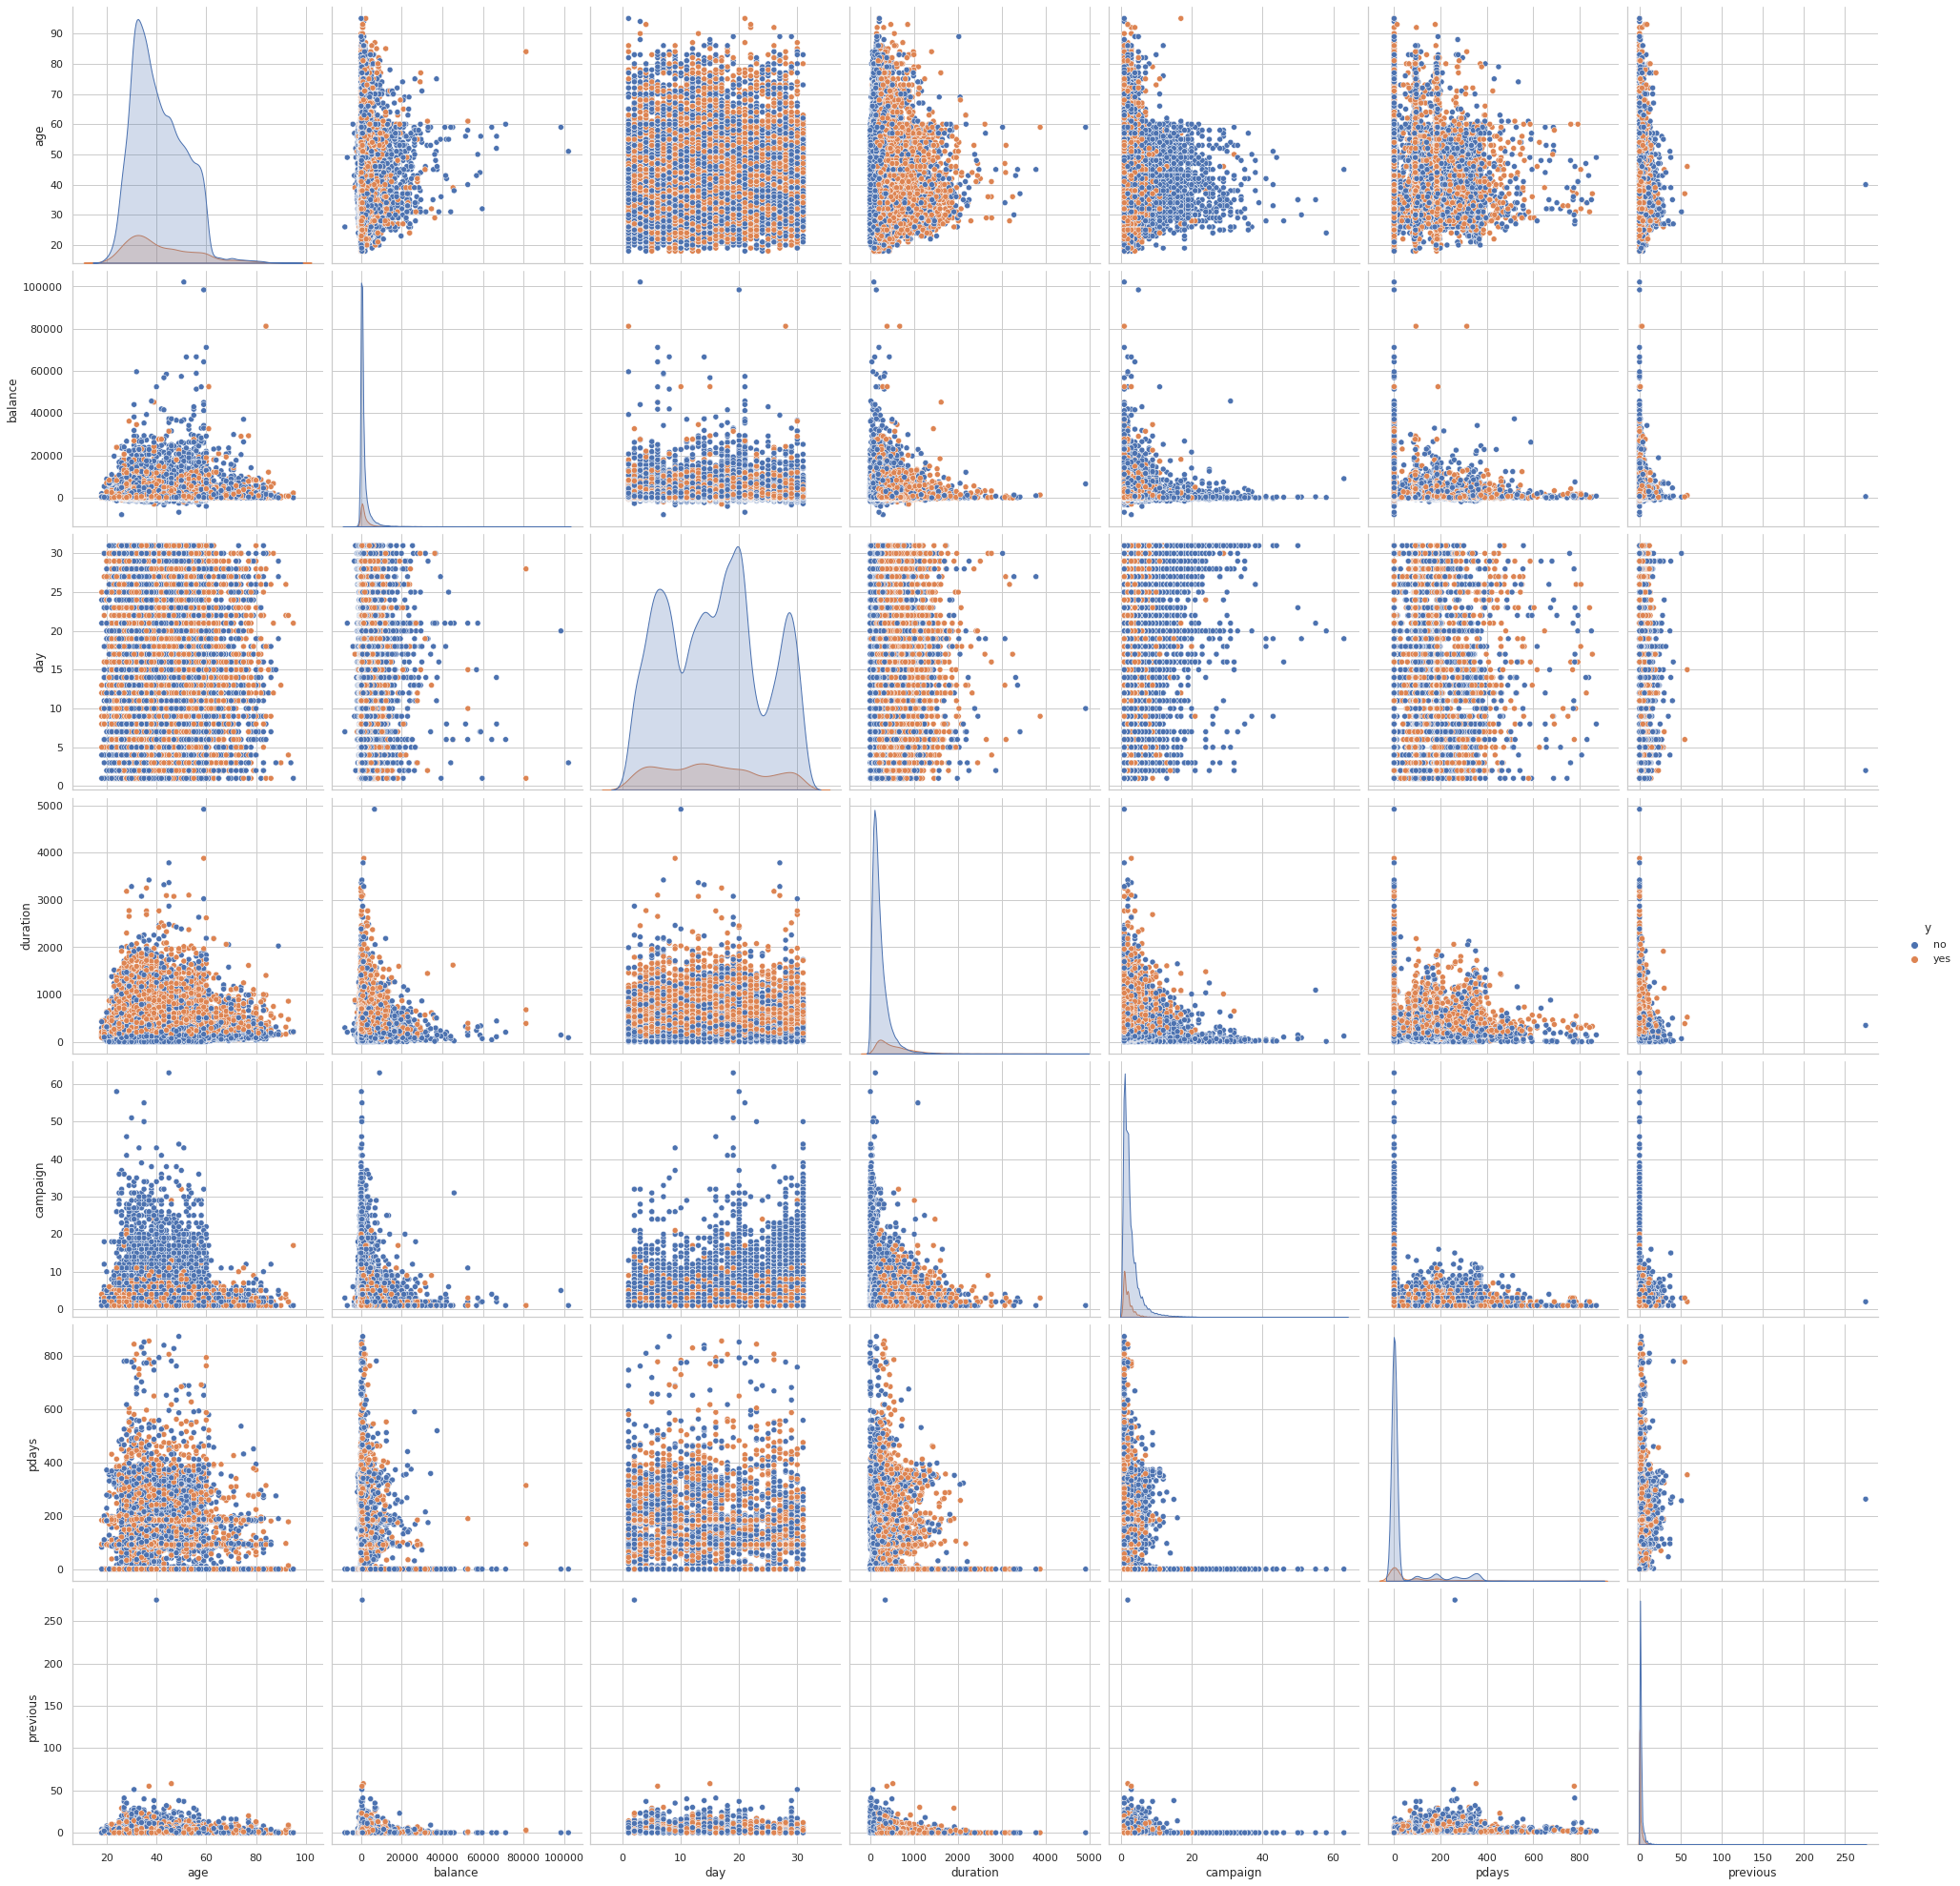

In [ ]:
draw_paiplot(df_bank_full)

From the above graphs its difficult to draw much insights about the correlation between the features. So for that purpose we can use other methods such as:
-Chi-Squared Test for categorical features
-Spearman’s Rank Correlation: Tests whether two samples have a monotonic relationship.

However, we can draw some other insights about the data
-People of age above 23 are less likely to subscrbe the term deposit.

In [ ]:
#Hypothesis Test to prove: "People of age above 23 are less likely to subscrbe the term deposit."
#create a new column called is_old and fill with true
df_bank_full['is_middle_aged'] = False
df_bank_full.loc[df_bank_full['age'] <=23 , 'is_middle_aged'] = True

In [ ]:
df_bank_full['y'].replace(['no', 'yes'], [0,1], inplace = True)

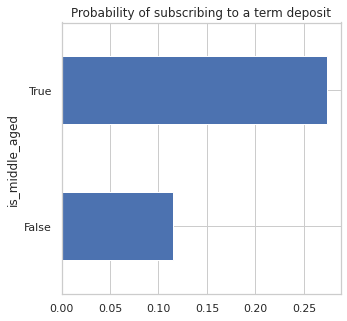

In [ ]:
X= df_bank_full.groupby('is_middle_aged')['y'].mean().sort_values().plot(kind = 'barh', title='Probability of subscribing to a term deposit',figsize=(5,5))

In [ ]:
df_bank_full['y'].replace([0, 1], ['no','yes'], inplace = True)

In [ ]:
# df_bank_full[['job','y']]


From the above plot we can say our hypothesis was correct.

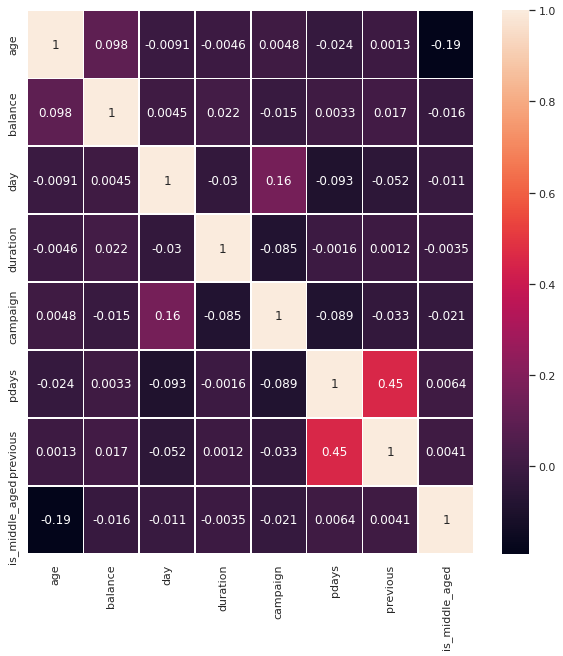

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))   
sns.heatmap(df_bank_full.corr(), annot=True,linewidths=.5, ax=ax)
plt.show()

From the above correlation matrix, there seems to be strong correlation between the features p_days and previous. we can verify that using hypothesis test.

In [ ]:
#Hypothesis test to check if there is a relationship between p_days and previous.
from scipy.stats import pearsonr
stat, p = pearsonr(df_bank_full['pdays'], df_bank_full['previous'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.454, p=0.000
Probably dependent


In [ ]:
from scipy.stats import spearmanr
stat, p = spearmanr(df_bank_full['pdays'], df_bank_full['previous'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.986, p=0.000
Probably dependent


From the above hypothesis we can conclude that the two might be related

In [ ]:
# Hypothesis test to check if there is a correlation between our target variable and other categorical variables

In [ ]:
# y and jobs
chisqt = pd.crosstab(df_bank_full.y, df_bank_full.job, margins=True)
print(chisqt)

job  admin.  blue-collar  entrepreneur  housemaid  management  retired  \
y                                                                        
no     4482         8984          1352       1142        8291     1785   
yes     689          748           135        165        1167      497   
All    5171         9732          1487       1307        9458     2282   

job  self-employed  services  student  technician  unemployed    All  
y                                                                     
no            1417      3776      785        6765        1143  39922  
yes            162       379      355         832         160   5289  
All           1579      4155     1140        7597        1303  45211  


In [ ]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(chisqt)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=855.665, p=0.000
Probably dependent


In [ ]:
# y and education
chisqt_edu = pd.crosstab(df_bank_full.y, df_bank_full.education, margins=True)
stat, p, dof, expected = chi2_contingency(chisqt_edu)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=20.235, p=0.003
Probably dependent


In [ ]:
# y and marital
chisqt_mar = pd.crosstab(df_bank_full.y, df_bank_full.marital, margins=True)
stat, p, dof, expected = chi2_contingency(chisqt_mar)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=196.496, p=0.000
Probably dependent


In [ ]:
# y and default
chisqt_def = pd.crosstab(df_bank_full.y, df_bank_full.default, margins=True)
stat, p, dof, expected = chi2_contingency(chisqt_def)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=22.724, p=0.000
Probably dependent


In [ ]:
# y and housing
chisqt_hou = pd.crosstab(df_bank_full.y, df_bank_full.housing, margins=True)
stat, p, dof, expected = chi2_contingency(chisqt_hou)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=875.694, p=0.000
Probably dependent


In [ ]:
# y and loan
chisqt_loa = pd.crosstab(df_bank_full.y, df_bank_full.loan, margins=True)
stat, p, dof, expected = chi2_contingency(chisqt_loa)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=210.195, p=0.000
Probably dependent


In [ ]:
# y and day
chisqt_day = pd.crosstab(df_bank_full.y, df_bank_full.day, margins=True)
stat, p, dof, expected = chi2_contingency(chisqt_day)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=574.051, p=0.000
Probably dependent


Univariate Analysis on Categorical data

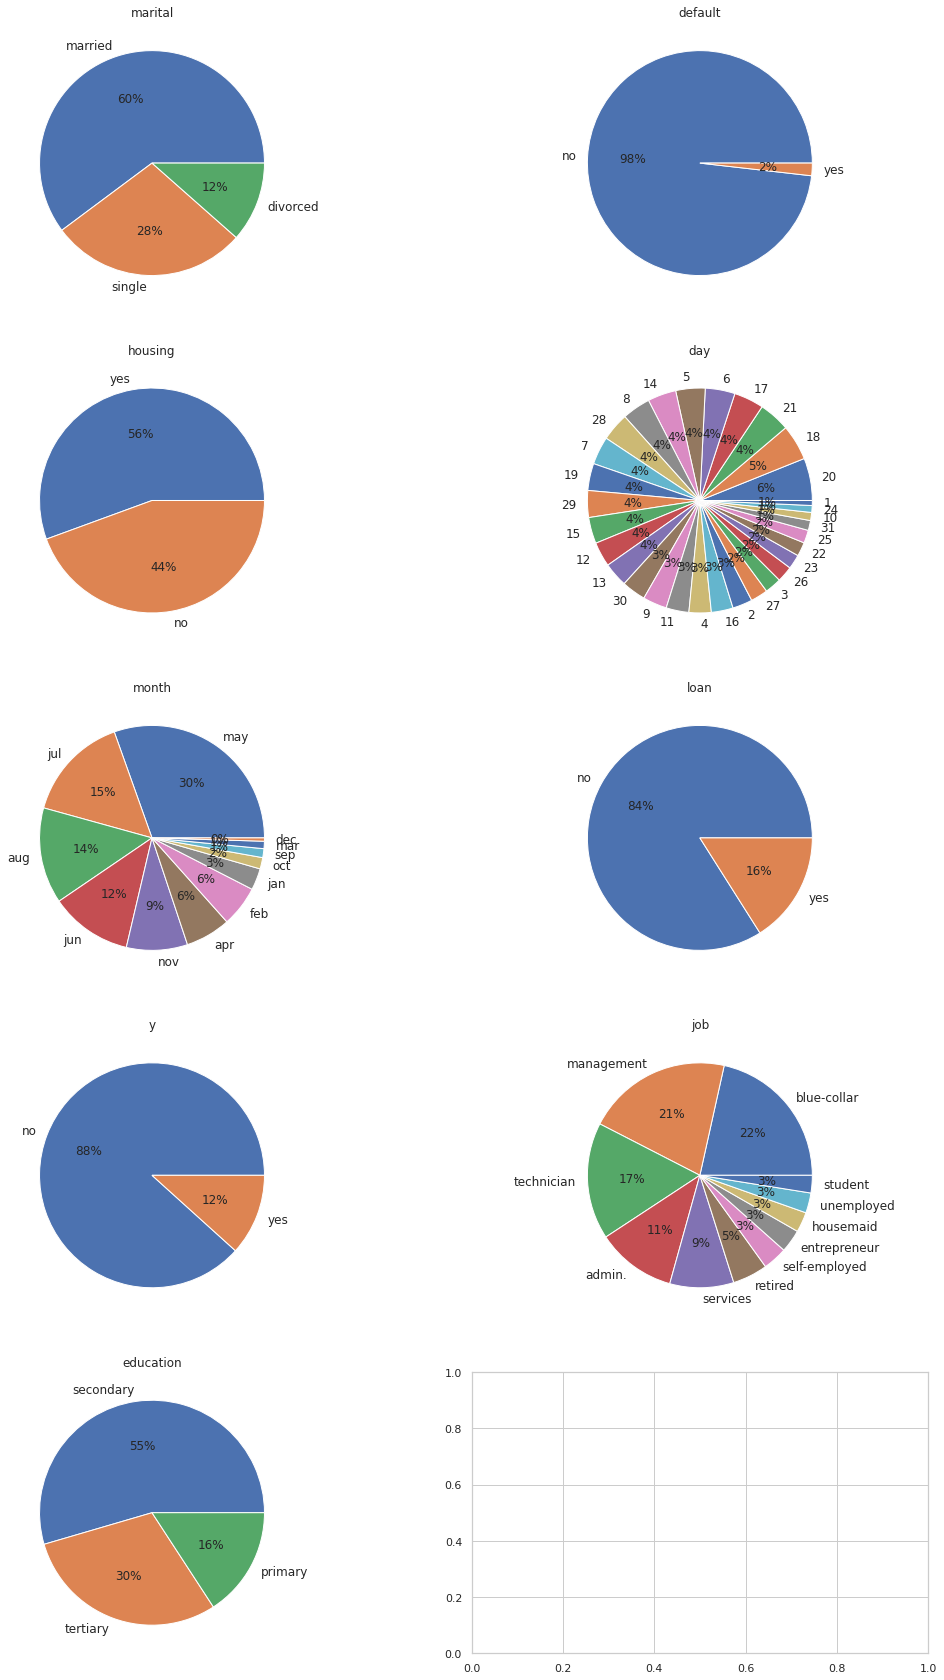

In [ ]:
#1. Pie chart to see propotion of samples
cat_cols=['marital', 'default','housing','day', 'month','loan','y','job','education']
fig, axes = plt.subplots(5, 2, figsize=(18,30))
axes = [ax for axes_rows in axes for ax in axes_rows]

for i, c in enumerate(df_bank_full[cat_cols]):
    df_bank_full[c].value_counts().plot(kind='pie',
                                          ax=axes[i],
                                          title=c,
                                          autopct='%.0f%%',
                                          fontsize=12)
    axes[i].set_ylabel('')

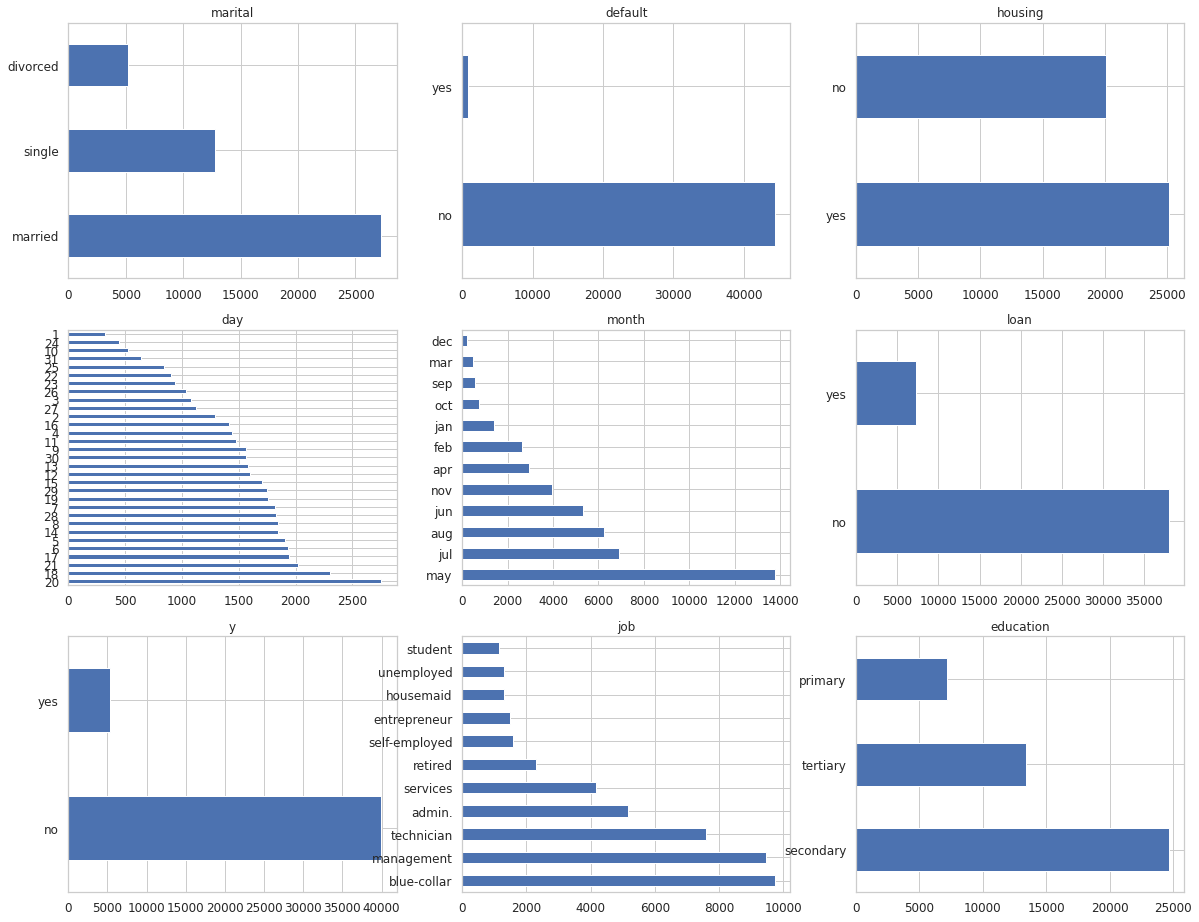

In [ ]:
#2. Bar plot to see frequency

fig, axes = plt.subplots(3, 3, figsize=(20,16))
axes = [ax for axes_rows in axes for ax in axes_rows]

for i, c in enumerate(df_bank_full[cat_cols]):
    df_bank_full[c].value_counts().plot(kind='barh',
                                          ax=axes[i],
                                          title=c,
                                          fontsize=12)

Observations

- Less number of students and more number of management and technician customers
- Most of married customers
- Most customers education levels is secondary
- Most cutomers are not defaulted in past
- More than 50% have taken housing loan
- Nearly 85% have taken personal loan
- Major communication type is cellular
- Most of the customers were last contacted in the month of May
- Most customers where not contacted in previous month

Bivariate Analysis for Categorical data

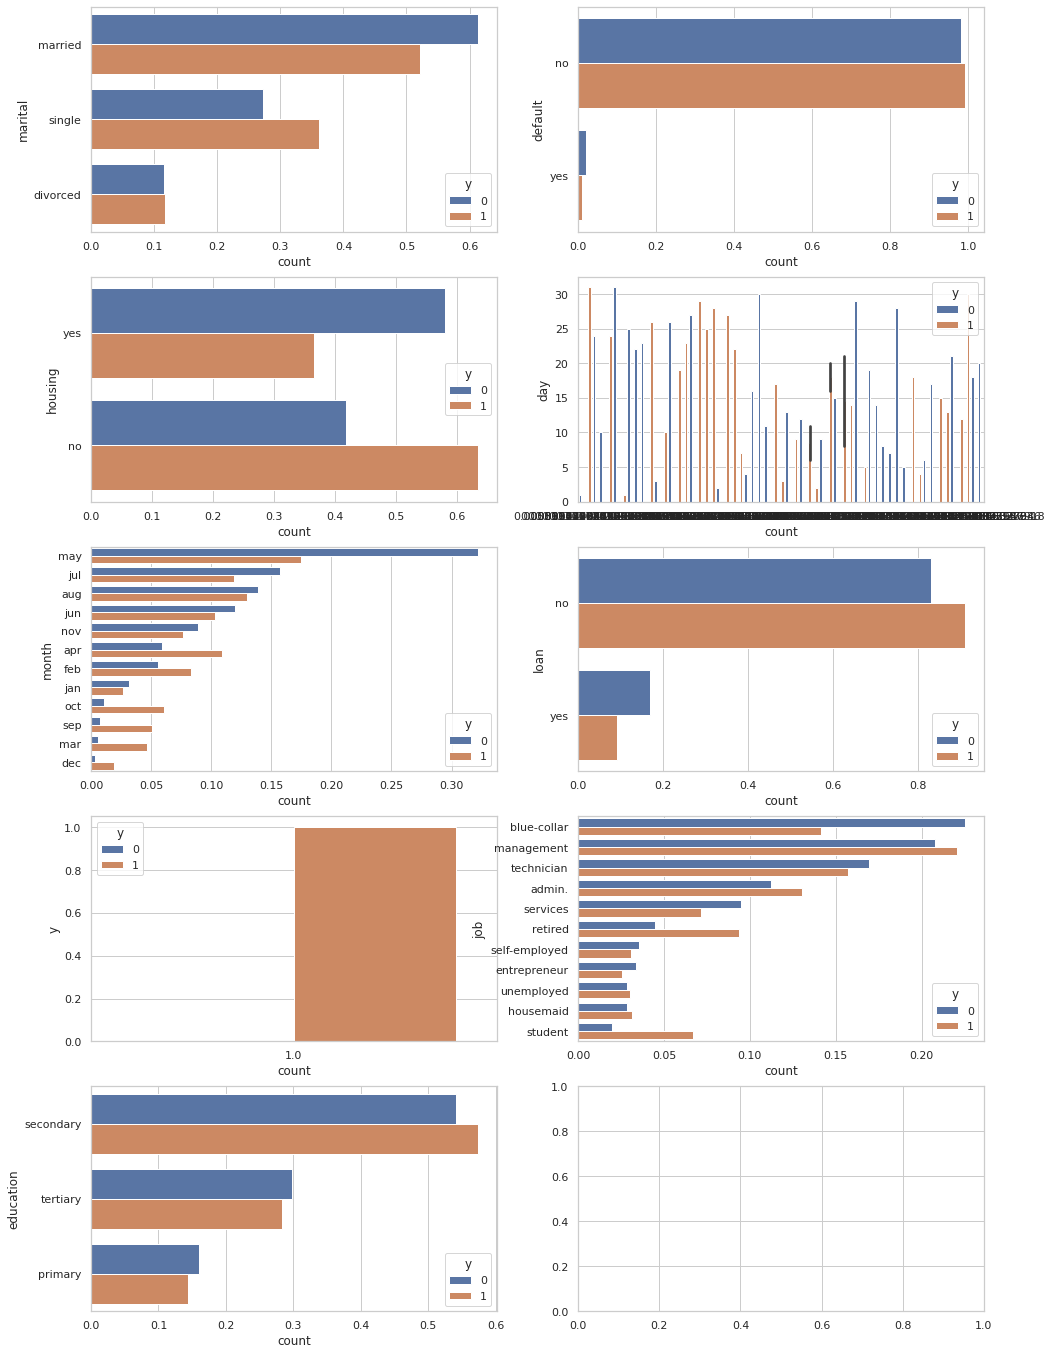

In [ ]:
target_col='y'
train=df_bank_full
train['y'].replace(['no', 'yes'], [0,1], inplace = True)
fig, axes = plt.subplots(5, 2, figsize=(16,24))
axes = [ax for axes_rows in axes for ax in axes_rows]

for i, c in enumerate(train[cat_cols]):
    #index of rows where target_col value is 0
    fltr = train[target_col]==0
    
    #dataframe conraining rows and columns where target_col value is 0
    #fltr-index of rows where target_col value is 0
    #c-column name
    #taking the value count
    #resetting index as column name
    vc_a=train[fltr][c].value_counts(normalize=True).reset_index().rename({'index':c,c:'count'}, axis=1)
    
    #dataframe conraining rows and columns where target_col value is 1
    vc_b=train[~fltr][c].value_counts(normalize=True).reset_index().rename({'index':c,c:'count'}, axis=1)
    
    #setting target_col value to 0 and 1 respectively
    vc_a[target_col]=0
    vc_b[target_col]=1
    
    #combining into single dataframe
    df = pd.concat([vc_a, vc_b]).reset_index(drop=True)
    
    #plotting
    sns.barplot(y=c, x='count', data=df, hue='y', ax=axes[i])
    

Observations

- Management, retire, self-employed, unemployed and students tend to subscribe more
- Singles subscribe more than married and divorced
- Customers with tertiary level of education will subscribe
- Customers with without housing and personal load tend to subscribe to team deposit
- Customers approached by cellular communication have subscribed
- Subscription rate is more during start(jan,feb,march,apr) and end of the year(oct,sept,dec)
- Customers who subscribed during previous campaign tend to subscribe more


### Final Recommendations & Conclusions

Recommendations for demograpgics:
- under the age of 23 or middle aged
- married customers
- individuals who have not defaulted in the past
- those who have taken out a personal loan
- those who were not contacted the previous month
- people with job titles / statuses such as management, retired, self-employed
- those with secondary or tertiary education
- customers who subscribed during a previous campaign


Recommended approach
- cellular
- during the start or end of the year (October - April)





In [ ]:
df_bank_full

,age,marital,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job,education,is_middle_aged
0,58,married,no,2143,yes,no,5,may,261,1,0,0,0,management,tertiary,False
1,44,single,no,29,yes,no,5,may,151,1,0,0,0,technician,secondary,False
2,33,married,no,2,yes,yes,5,may,76,1,0,0,0,entrepreneur,secondary,False
3,47,married,no,1506,yes,no,5,may,92,1,0,0,0,blue-collar,tertiary,False
4,33,single,no,1,no,no,5,may,198,1,0,0,0,management,tertiary,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,married,no,825,no,no,17,nov,977,3,0,0,1,student,secondary,False
45207,71,divorced,no,1729,no,no,17,nov,456,2,0,0,1,student,primary,False
45208,72,married,no,5715,no,no,17,nov,1127,5,184,3,1,student,secondary,False
45209,57,married,no,668,no,no,17,nov,508,4,0,0,0,student,secondary,False


In [ ]:
# We will encode the categorical columns which do not have unknown values using one hot encoding,
independent_cat_col=['marital', 'default','housing','day', 'month','loan','y','is_middle_aged']
dependent_cat_col=['job','education','age']
# One-hot encoding df_bank
data_hot_encoded = pd.get_dummies(df_bank_full[independent_cat_col])

#Extract only the columns that didnt need to be encoded
data_other_cols = df_bank_full.drop(columns=independent_cat_col)

#Concatenate the two dataframes : 
df_bank_full_out = pd.concat([data_hot_encoded, data_other_cols], axis=1)
df_bank_full_out

,day,y,is_middle_aged,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,...,loan_no,loan_yes,age,balance,duration,campaign,pdays,previous,job,education
0,5,0,False,0,1,0,1,0,0,1,...,1,0,58,2143,261,1,0,0,management,tertiary
1,5,0,False,0,0,1,1,0,0,1,...,1,0,44,29,151,1,0,0,technician,secondary
2,5,0,False,0,1,0,1,0,0,1,...,0,1,33,2,76,1,0,0,entrepreneur,secondary
3,5,0,False,0,1,0,1,0,0,1,...,1,0,47,1506,92,1,0,0,blue-collar,tertiary
4,5,0,False,0,0,1,1,0,1,0,...,1,0,33,1,198,1,0,0,management,tertiary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,17,1,False,0,1,0,1,0,1,0,...,1,0,51,825,977,3,0,0,student,secondary
45207,17,1,False,1,0,0,1,0,1,0,...,1,0,71,1729,456,2,0,0,student,primary
45208,17,1,False,0,1,0,1,0,1,0,...,1,0,72,5715,1127,5,184,3,student,secondary
45209,17,0,False,0,1,0,1,0,1,0,...,1,0,57,668,508,4,0,0,student,secondary


In [ ]:
df_bank_full_out['job'].replace(['management', 'technician', 'entrepreneur', 'blue-collar', 'retired', 'admin.', 'services', 'self-employed', 'unemployed', 'housemaid', 'student'], [0,1,2,3,4,5,6,7,8,9,10], inplace = True)
df_bank_full_out['education'].replace(['primary','secondary','tertiary'], [1,2,3], inplace = True)
df_bank_full_out['is_middle_aged'].replace(['False', 'True'], [0,1], inplace = True)
df_bank_full_out

,day,y,is_middle_aged,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,...,loan_no,loan_yes,age,balance,duration,campaign,pdays,previous,job,education
0,5,0,False,0,1,0,1,0,0,1,...,1,0,58,2143,261,1,0,0,0,3
1,5,0,False,0,0,1,1,0,0,1,...,1,0,44,29,151,1,0,0,1,2
2,5,0,False,0,1,0,1,0,0,1,...,0,1,33,2,76,1,0,0,2,2
3,5,0,False,0,1,0,1,0,0,1,...,1,0,47,1506,92,1,0,0,3,3
4,5,0,False,0,0,1,1,0,1,0,...,1,0,33,1,198,1,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,17,1,False,0,1,0,1,0,1,0,...,1,0,51,825,977,3,0,0,10,2
45207,17,1,False,1,0,0,1,0,1,0,...,1,0,71,1729,456,2,0,0,10,1
45208,17,1,False,0,1,0,1,0,1,0,...,1,0,72,5715,1127,5,184,3,10,2
45209,17,0,False,0,1,0,1,0,1,0,...,1,0,57,668,508,4,0,0,10,2


In [ ]:

X = df_bank_full_out.drop('y', axis = 1)
y = df_bank_full_out.y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, 
                                                    random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11967
           1       0.61      0.18      0.27      1597

    accuracy                           0.89     13564
   macro avg       0.75      0.58      0.61     13564
weighted avg       0.86      0.89      0.86     13564

